520h0684 - Nguyễn Minh Thiện


519H0044 - Hồ Minh Chí Tân

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as mno

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('vgsales.csv')

# Print the DataFrame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# check null data

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Check Duplicate

df.duplicated().sum()

0

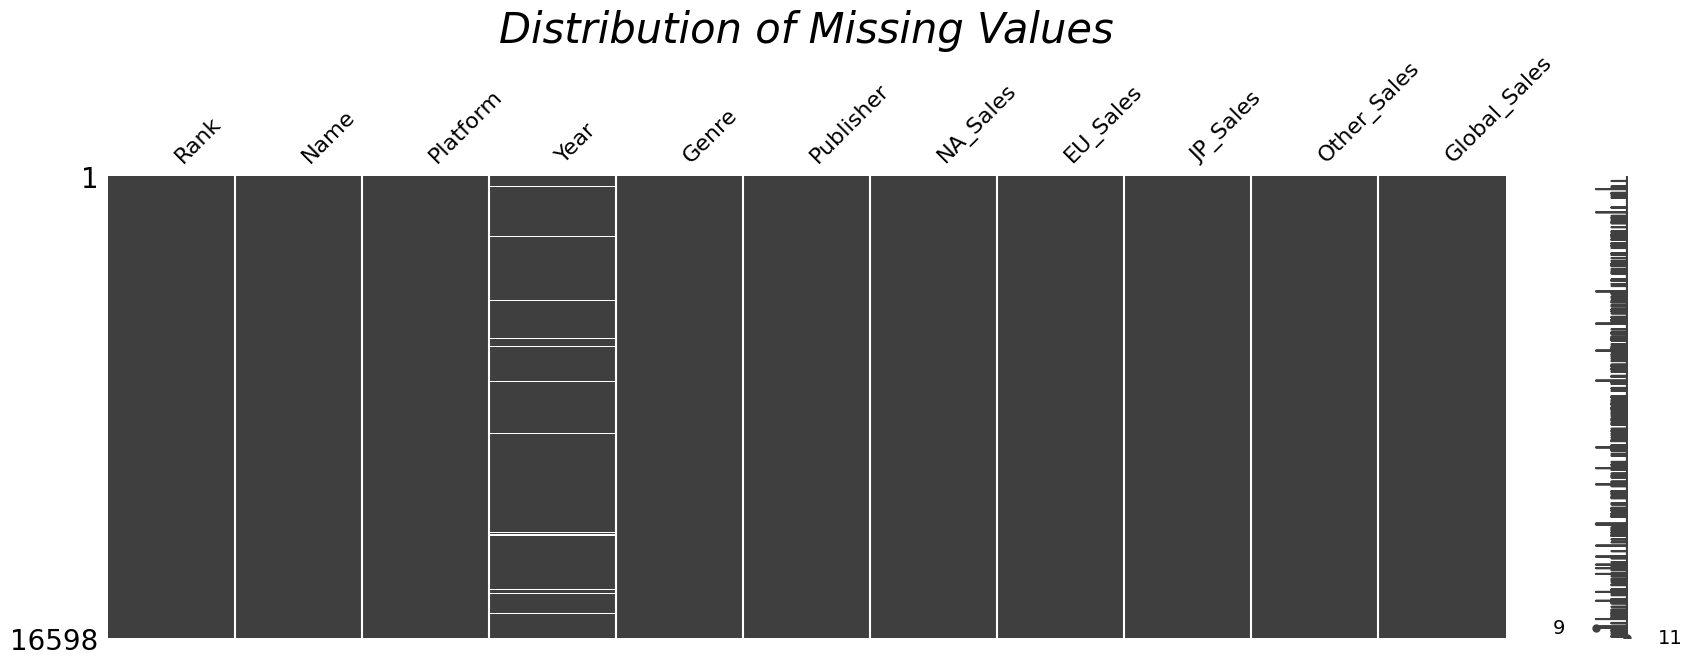

In [ ]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

In [ ]:
# summary statstics of numerical values

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Summary for categorial features

cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


count
column    value                              
Genre     Puzzle                          582
          Strategy                        681
          Fighting                        848
          Simulation                      867
          Platform                        886
...                                       ...
Publisher Konami Digital Entertainment    832
          Ubisoft                         921
          Namco Bandai Games              932
          Activision                      975
          Electronic Arts                1351

[12114 rows x 1 columns]

<ipython-input-57-ff47b33abdab>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True)


<Axes: >

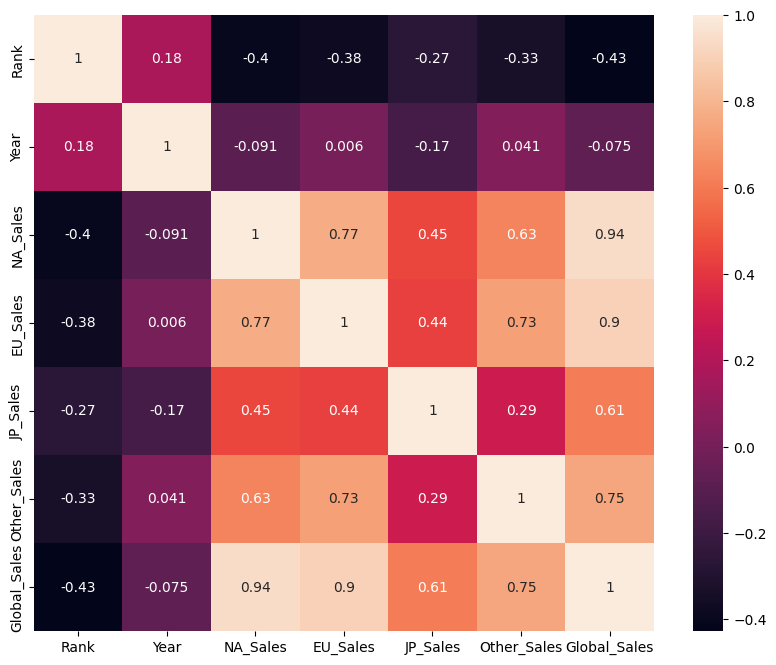

In [ ]:
# correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot = True)

Conclusion : strongest relation between NA_sales and Global sales which mean NA_sales take a large part from Global sales

In [ ]:
df2=df[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
df2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00,0.01
16594,Shooter,0.01,0.00,0.00,0.00,0.01
16595,Racing,0.00,0.00,0.00,0.00,0.01
16596,Puzzle,0.00,0.01,0.00,0.00,0.01


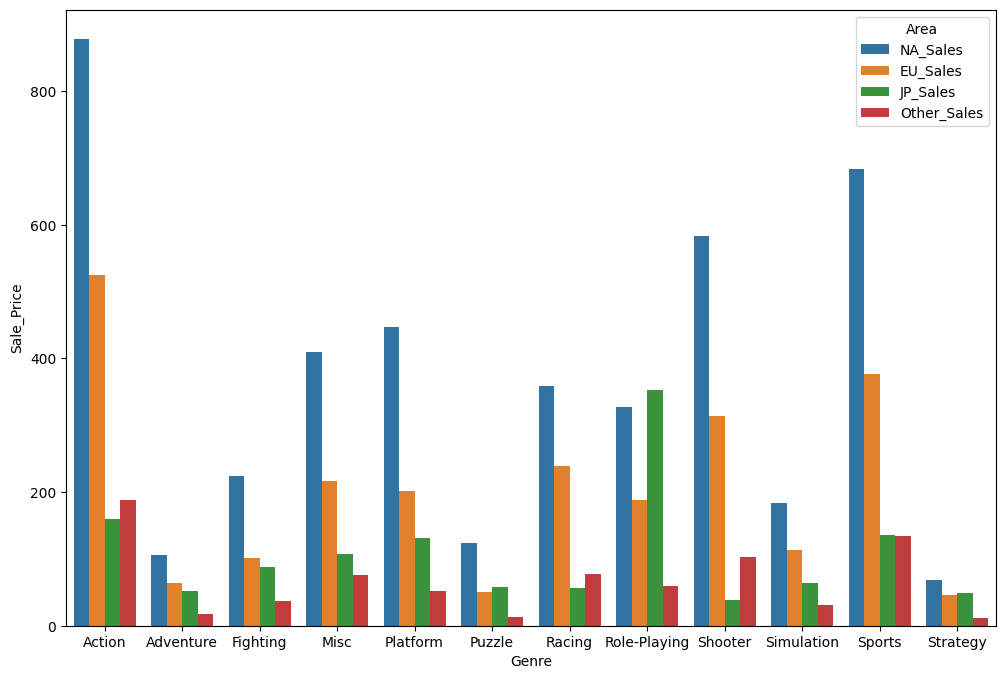

In [ ]:
# Visualization

plt.figure(figsize=(12, 8))
G=df2.groupby(["Genre"]).sum()
Genres=G.reset_index()
Genres=pd.melt(Genres, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Area', value_name='Sale_Price')
sns.barplot(x="Genre",y="Sale_Price",data=Genres,hue="Area")
plt.show()

Data preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , LabelEncoder
from sklearn.impute import KNNImputer


In [ ]:
le = LabelEncoder()

In [ ]:
# Handling missing data

df['Year'].fillna(method = 'ffill' , inplace = True)
df['Publisher'].fillna(method = 'ffill', inplace = True)

In [ ]:
round((df.isnull().sum()/df.shape[0])*100 , 2)

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

In [ ]:
# remove first column "rank" because not necessary
df.drop(['Rank','Name'], axis =1 , inplace = True)
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# label encode the feature

df['Platform'] = le.fit_transform(df['Platform'])
df['Genre'] = le.fit_transform(df['Genre'])
df['Publisher'] = le.fit_transform(df['Publisher'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.drop(['Global_Sales'] , axis =1 ).values
y = df['Global_Sales'].values
x_train , x_test , y_train , y_test =  train_test_split(x,y , test_size = 0.20 , random_state = 42)

In [ ]:
x_train.shape


(13278, 8)

In [ ]:
x_test.shape

(3320, 8)

In [ ]:
ro_scaler = MinMaxScaler()
x_train =  ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
dv = pd.DataFrame({'Y_test': y_test ,'y_pred': lr_pred})
dv.head(15)

,Y_test,y_pred
0,0.15,0.093865
1,0.40,0.311724
2,0.02,0.009372
3,0.03,0.011965
4,0.36,0.251998
5,2.24,1.733610
6,0.39,0.270830
7,0.65,0.472843
8,0.21,0.137124
9,0.44,0.844026


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regressor object
regressor = DecisionTreeRegressor(max_depth=5)

# Train the model on the training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
dc_pred = regressor.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create and train an AdaBoostRegressor with 100 weak learners
regressor = AdaBoostRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

# Make predictions on the test data
abr_pred = regressor.predict(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train a Gradient BoostingRegressor with 100 trees and learning rate 0.1
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
regressor.fit(x_train, y_train)

# Make predictions on the test data
gbr_pred = regressor.predict(x_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create an MLP regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=100)

# Train the model
mlp_regressor.fit(x_train, y_train)

# Make predictions on the test set
mlp_pred = mlp_regressor.predict(x_test)

In [ ]:
x_train.shape

(13278, 8)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))  # Adjust input_shape
model.add(LSTM(units=50))
model.add(Dense(1))  # Single output neuron for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Make predictions
lstm_pred = model.predict(x_test)

Epoch 1/20
415/415 [==============================] - 6s 8ms/step - loss: 1.9411 - val_loss: 3.9406
Epoch 2/20
415/415 [==============================] - 3s 7ms/step - loss: 1.4798 - val_loss: 2.2798
Epoch 3/20
415/415 [==============================] - 3s 7ms/step - loss: 0.6073 - val_loss: 2.0328
Epoch 4/20
415/415 [==============================] - 3s 7ms/step - loss: 0.4191 - val_loss: 1.9060
Epoch 5/20
415/415 [==============================] - 3s 7ms/step - loss: 0.3580 - val_loss: 2.0443
Epoch 6/20
415/415 [==============================] - 3s 7ms/step - loss: 0.3406 - val_loss: 1.6996
Epoch 7/20
415/415 [==============================] - 3s 7ms/step - loss: 0.2944 - val_loss: 1.6166
Epoch 8/20
415/415 [==============================] - 3s 7ms/step - loss: 0.2945 - val_loss: 1.5822
Epoch 9/20
415/415 [==============================] - 3s 6ms/step - loss: 0.2579 - val_loss: 1.4833
Epoch 10/20
415/415 [==============================] - 3s 7ms/step - loss: 0.2289 - val_loss: 1.4392

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error ,mean_absolute_percentage_error , mean_squared_error

In [ ]:
reg_sc = r2_score(y_test,y_pred)

p = len(x_train[0])
n = len(y_train)
adj_r2 = 1-((reg_sc) * (n-1)) / (n-p-1)

mse = mean_squared_error(y_test,y_pred)

mape = mean_absolute_percentage_error(y_test,y_pred)

MAE = mean_absolute_error(y_test,y_pred)

print("R-squared:", reg_sc)
print("\nNumber of features (p):", p)
print("Number of data points (n):", n)
print("\nAdjusted R-squared:", adj_r2)

print("\nMean Squared Error (MSE):", mse)
print("\nMean Absolute Percentage Error (MAPE):", mape)
print("\nMean Absolute Error (MAE):", MAE)

R-squared: 0.7141661892236133

Number of features (p): 8
Number of data points (n): 13278

Adjusted R-squared: 0.2854032335276272

Mean Squared Error (MSE): 1.2008918758467535

Mean Absolute Percentage Error (MAPE): 3.1173351881911606

Mean Absolute Error (MAE): 0.431084948198982


K-fold Cross Validation


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Number of folds for cross-validation
n_splits = 5

# Create KFold object
kf = KFold(n_splits=n_splits, shuffle=True)

# Iterate through each fold
for train_index, test_index in kf.split(x_train):
    # Split data for the current fold
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train model on x_train_fold, y_train_fold (linear regression)
    k_lr = LinearRegression()
    k_lr.fit(x_train_fold , y_train_fold)
    k_lr_pred = lr.predict(x_test)

    # Train model on x_train_fold, y_train_fold (decision tree)
    k_dc = DecisionTreeRegressor(max_depth=5)
    k_dc.fit(x_train_fold, y_train_fold)
    k_dc_pred = regressor.predict(x_test_fold)

    # Train model on x_train_fold, y_train_fold (AdaBoostRegressor)
    k_ada = AdaBoostRegressor(n_estimators=100)
    k_ada.fit(x_train_fold, y_train_fold)
    k_abr_pred = regressor.predict(x_test_fold)

    # Train model on x_train_fold, y_train_fold (Gradient BoostingRegressor)
    k_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
    k_gb.fit(x_train_fold, y_train_fold)
    k_gbr_pred = regressor.predict(x_test_fold)

    # Train model on x_train_fold, y_train_fold (MLP regressor)
    k_mlp_regressor = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=100)
    k_mlp_regressor.fit(x_train_fold, y_train_fold)
    k_mlp_pred = mlp_regressor.predict(x_test_fold)

    # Train model on x_train_fold, y_train_fold (LSTM)
    k_model = Sequential()
    k_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_fold.shape[1],1)))  # Adjust input_shape
    k_model.add(LSTM(units=50))
    k_model.add(Dense(1))  # Single output neuron for regression

    # Compile the model
    k_model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    k_model.fit(x_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(x_test_fold, y_test_fold))

    # Make predictions
    k_lstm_pred = model.predict(x_test_fold)


Epoch 1/20
332/332 [==============================] - 6s 10ms/step - loss: 2.0001 - val_loss: 1.6033
Epoch 2/20
332/332 [==============================] - 2s 7ms/step - loss: 1.4553 - val_loss: 0.8553
Epoch 3/20
332/332 [==============================] - 2s 7ms/step - loss: 0.6926 - val_loss: 0.2593
Epoch 4/20
332/332 [==============================] - 2s 7ms/step - loss: 0.5023 - val_loss: 0.3074
Epoch 5/20
332/332 [==============================] - 2s 7ms/step - loss: 0.4181 - val_loss: 0.2639
Epoch 6/20
332/332 [==============================] - 2s 8ms/step - loss: 0.3901 - val_loss: 0.2570
Epoch 7/20
332/332 [==============================] - 2s 7ms/step - loss: 0.3389 - val_loss: 0.1563
Epoch 8/20
332/332 [==============================] - 2s 7ms/step - loss: 0.3150 - val_loss: 0.3122
Epoch 9/20
332/332 [==============================] - 2s 7ms/step - loss: 0.2913 - val_loss: 0.1037
Epoch 10/20
332/332 [==============================] - 2s 7ms/step - loss: 0.2481 - val_loss: 0.138

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,         # Stop after 10 epochs with no improvement
    restore_best_weights=True  # Load best model weights
)

# Train model with early stopping
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0330 - val_loss: 0.8293
Epoch 2/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0233 - val_loss: 0.7267
Epoch 3/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0151 - val_loss: 0.7905
Epoch 4/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0154 - val_loss: 0.7498
Epoch 5/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0191 - val_loss: 0.7451
Epoch 6/20
415/415 [==============================] - 3s 8ms/step - loss: 0.0153 - val_loss: 0.7541
Epoch 7/20
415/415 [==============================] - 4s 9ms/step - loss: 0.0147 - val_loss: 0.7592
